<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/3.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85%20%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%206.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# _K_ ближайших соседей


## [Ссылка на код с пары](https://colab.research.google.com/drive/1VCRO7GkMyCvmQIy1rzWpK1Wtueya1IFo?usp=sharing)


## KNN для классификации


### Получение данных

Будем работать с набором данным `iris` из `sklearn`.


In [1]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn


#### 1.1. Разбейте данные на обучение и тест


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

#### 1.2. Обучите модель KNN


In [3]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели


In [4]:
pred_test = model.predict(X_test)
display(pred_test, y_test.astype(dtype='float'))

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

In [5]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred_test, y_test)
accuracy

1.0

#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$


In [6]:
df = pd.DataFrame({'neighbours_count': pd.Series(dtype='int'),
                   'accuracy': pd.Series(dtype='float')})

for i in range(0, 38):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred_test)
    df.loc[i] = [i, acc]


df.head(50)

,neighbours_count,accuracy
0,0.0,1.0
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
6,6.0,1.0
7,7.0,1.0
8,8.0,1.0
9,9.0,1.0


### 2. KNN рукописный


#### 2.1. Возьмите два случайных тестовых объектов


In [7]:
import numpy as np

random_objects = X_test.sample(n=2)

random_objects

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
11,4.8,3.4,1.6,0.2
19,5.1,3.8,1.5,0.3


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения


In [8]:
import numpy as np
import pandas as pd

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows(): 
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

#### 2.3. Выберите топ $k$ соседей для каждого объекта


In [9]:
distances.sort_values(['object_idx', 'dst'], ascending=True).head(1000)
for test_idx, test_row in random_objects.iterrows():
    print(distances[distances['object_idx']==test_idx].sort_values(['dst']).head(3))

    object_idx  train_idx       dst
43        11.0        7.0  0.223607
17        11.0       24.0  0.300000
61        11.0        6.0  0.300000
     object_idx  train_idx       dst
189        19.0       21.0  0.141421
175        19.0       46.0  0.141421
185        19.0       48.0  0.244949


#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях


In [10]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    test_points_Y.append(X_test.loc[test_idx].values[1])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

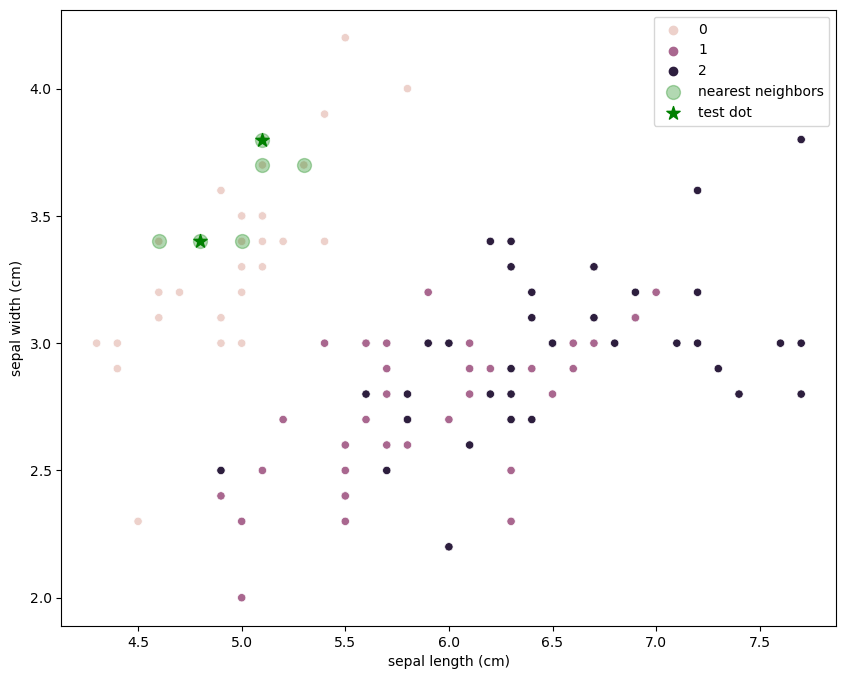

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ["darkorange", "darkblue"]



plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
)

plt.scatter(X_train.iloc[:,0].loc[nearest_neigbors_idxs], X_train.iloc[:,1].loc[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(test_points_X, test_points_Y, c='g',
            marker='*', s=100, label='test dot')
plt.legend()

#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов


In [12]:
import statistics

for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Real value:', real_value,'–', 'Predicted value:', statistics.mode(prdicted_values))
    

Real value: 0 – Predicted value: 0
Real value: 0 – Predicted value: 0


## KNN для регрессии


### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.


In [13]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn


#### 3.1. Разбейте данные на обучение и тест


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

Затем нормализуйте данные:


In [15]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(
    X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(
    X_test[X_train.columns]), columns=X_train.columns)

#### 3.2. Обучите модель KNN


In [16]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 5
model = KNeighborsRegressor(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели


In [17]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_2 = r2_score(y_pred=y_pred, y_true=y_test)
r_2

0.6940895332946582

#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$


In [18]:
df = pd.DataFrame({'neighbours_count': pd.Series(dtype='int'),
                   'metric': pd.Series(dtype='float')})

for i in range(0, 38):
    knn = KNeighborsRegressor(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r_2 = r2_score(y_pred=y_pred, y_true=y_test)
    df.loc[i] = [i, r_2]

df['neighbours_count'] = df['neighbours_count'].astype('int')
df.head(50)

,neighbours_count,metric
0,0,0.543406
1,1,0.645866
2,2,0.673335
3,3,0.683751
4,4,0.694090
5,5,0.701883
6,6,0.702509
7,7,0.703539
8,8,0.702904
9,9,0.702269


### 4. KNN рукописный


#### 4.1. Возьмите два случайных тестовых объектов


In [19]:
import numpy as np

random_objects = X_test.sample(n=2)

random_objects

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
652,0.148370,0.392157,0.029011,0.023513,0.039939,0.001732,0.851064,0.198207
1022,0.118074,0.352941,0.025462,0.026193,0.034838,0.001397,0.256383,0.391434


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения


In [20]:
import numpy as np
import pandas as pd

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows(): 
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')
distances.sort_values(['object_idx', 'dst'], ascending=True).head(10)


,object_idx,train_idx,dst
11982,652,11981,0.015850
8278,652,8277,0.039801
7273,652,7272,0.044847
6500,652,6499,0.049560
8971,652,8970,0.052547
9624,652,9623,0.053075
1218,652,1217,0.055882
2009,652,2008,0.056442
13778,652,13777,0.056525
8268,652,8267,0.061999


#### 4.3. Выберите топ $k$ соседей для каждого объекта


In [21]:
for test_idx, test_row in random_objects.iterrows():
    print(distances[distances['object_idx']==test_idx].sort_values(['dst']).head(10))

       object_idx  train_idx       dst
11982         652      11981  0.015850
8278          652       8277  0.039801
7273          652       7272  0.044847
6500          652       6499  0.049560
8971          652       8970  0.052547
9624          652       9623  0.053075
1218          652       1217  0.055882
2009          652       2008  0.056442
13778         652      13777  0.056525
8268          652       8267  0.061999
       object_idx  train_idx       dst
19303        1022       4854  0.035539
15889        1022       1440  0.038868
22068        1022       7619  0.046306
23259        1022       8810  0.049324
18909        1022       4460  0.057975
15913        1022       1464  0.059365
15581        1022       1132  0.066035
21712        1022       7263  0.067955
27964        1022      13515  0.068627
23685        1022       9236  0.069556


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях


In [22]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    test_points_Y.append(X_test.loc[test_idx].values[1])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

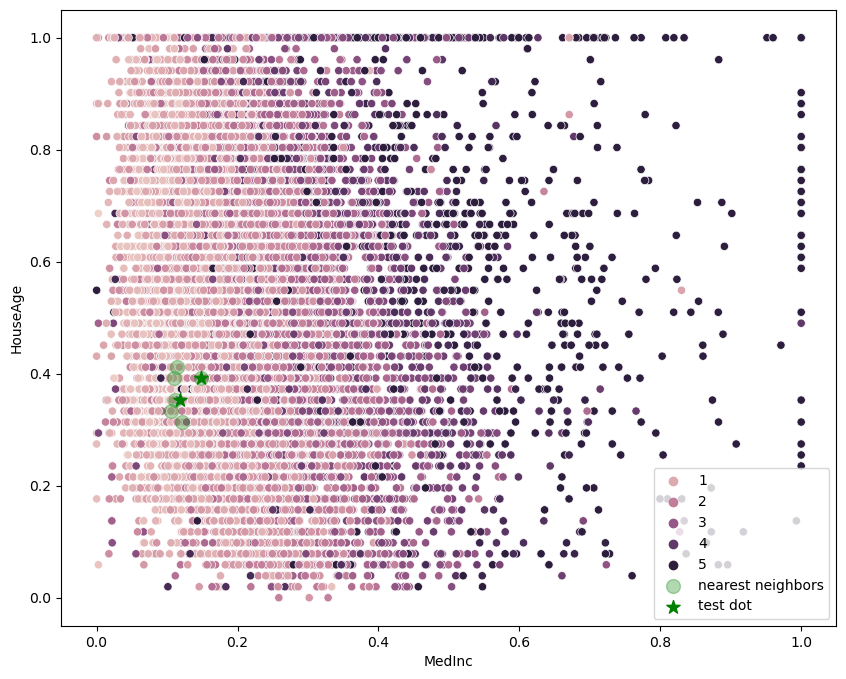

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ["darkorange", "darkblue"]



plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
)

plt.scatter(X_train.iloc[:,0].loc[nearest_neigbors_idxs], X_train.iloc[:,1].loc[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(test_points_X, test_points_Y, c='g',
            marker='*', s=100, label='test dot')
plt.legend()

#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов


In [24]:
import statistics

for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Real value:', real_value,'–', 'Predicted value:', statistics.mean(prdicted_values))
    

Real value: 1.133 – Predicted value: 0.8086666666666666
Real value: 1.32 – Predicted value: 1.9236666666666666


Предсказания отклоняются от истины, но не так сильно, они довольно близки.


# Weighted KNN


## KNN для классификации


### Получение данных

Будем работать с набором данным `iris` из `sklearn`.


In [52]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))


In [54]:
df = X.iloc[:,[0,3]]
df

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


### Визуализируйте ваши данные на графике


<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

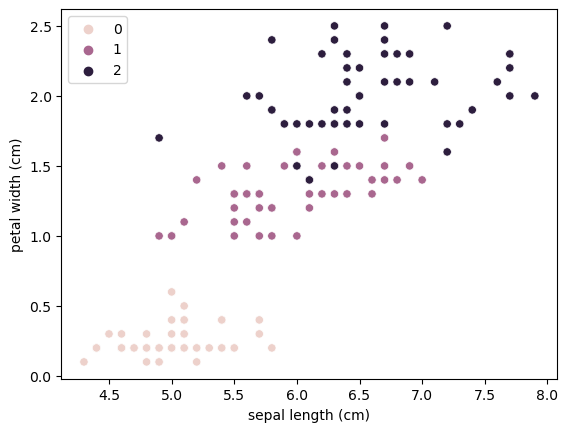

In [55]:
sns.scatterplot(data=df, x="sepal length (cm)", y="petal width (cm)" , hue=y)

### 1. KNN из sklearn


#### 1.1. Разбейте данные на обучение и тест


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((105, 2), (45, 2))

#### 1.2. Обучите модель KNN на 50 соседях


In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 1.3. Проверьте качество работы модели


In [58]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8888888888888888

#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения


In [59]:
import numpy as np

random_objects = X_test.sample(n=1)

random_objects

,sepal length (cm),petal width (cm)
108,6.7,1.8


In [60]:
import numpy as np
import pandas as pd

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows(): 
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')
distances.sort_values(['object_idx', 'dst'], ascending=True).head(10)

,object_idx,train_idx,dst
40,108,77,0.100000
95,108,116,0.200000
73,108,147,0.282843
3,108,137,0.300000
83,108,124,0.300000
36,108,111,0.316228
62,108,112,0.316228
66,108,54,0.360555
71,108,139,0.360555
91,108,52,0.360555


#### 1.5. Выберите топ k соседей


In [61]:
for test_idx, test_row in random_objects.iterrows():
    print(distances[distances['object_idx']==test_idx].sort_values(['dst']).head(50))

     object_idx  train_idx       dst
40          108         77  0.100000
95          108        116  0.200000
73          108        147  0.282843
3           108        137  0.300000
83          108        124  0.300000
36          108        111  0.316228
62          108        112  0.316228
71          108        139  0.360555
66          108         54  0.360555
91          108         52  0.360555
93          108        103  0.400000
16          108        123  0.400000
4           108         75  0.412311
105         108        102  0.500000
68          108         50  0.500000
55          108        125  0.500000
67          108        126  0.500000
59          108         72  0.500000
2           108        133  0.500000
78          108         58  0.509902
47          108        120  0.538516
87          108        129  0.538516
69          108        115  0.583095
97          108         74  0.583095
82          108        107  0.600000
89          108        140  0.600000
9

#### 1.6. Выведите финальное предсказание для этого объекта


In [62]:
import statistics

for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Real value:', real_value)
    print('Predicted value:', statistics.mode(prdicted_values))
    

Real value: 2
Predicted value: 2


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`


In [63]:
knn_prediction = knn.predict(random_objects)
print("KNN Prediction:", knn_prediction[0])

KNN Prediction: 2


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей


In [64]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    test_points_Y.append(X_test.loc[test_idx].values[1])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(50)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

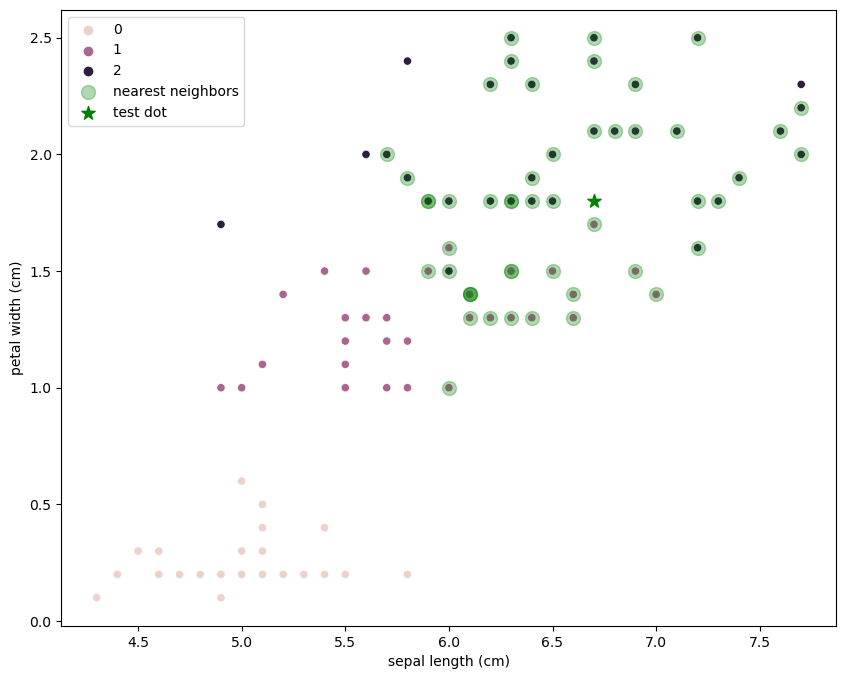

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ["darkorange", "darkblue"]



plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
)

plt.scatter(X_train.iloc[:,0].loc[nearest_neigbors_idxs], X_train.iloc[:,1].loc[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(test_points_X, test_points_Y, c='g',
            marker='*', s=100, label='test dot')
plt.legend()

### 2. Weighted KNN


#### 2.1. Обучите модель "взвешенный KNN" по дистанции


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_weighted = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_test)

#### 2.2. Проверьте качество работы модели


In [70]:
accuracy_weighted = knn_weighted.score(X_test, y_test)
accuracy_weighted

0.9555555555555556

#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения


In [71]:
import numpy as np

random_objects = random_objects

random_objects

,sepal length (cm),petal width (cm)
108,6.7,1.8


#### 2.4. Выберите топ k соседей


In [72]:
import numpy as np
import pandas as pd

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows(): 
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')
distances.sort_values(['object_idx', 'dst'], ascending=True).head(12)

,object_idx,train_idx,dst
40,108,77,0.100000
95,108,116,0.200000
73,108,147,0.282843
3,108,137,0.300000
83,108,124,0.300000
36,108,111,0.316228
62,108,112,0.316228
66,108,54,0.360555
71,108,139,0.360555
91,108,52,0.360555


#### 2.5. Рассчитайте вес для каждого соседа


In [74]:
distances['weight'] = 1/ distances['dst']
distances.sort_values(['object_idx', 'weight'], ascending=False).head(12)


,object_idx,train_idx,dst,weight
40,108,77,0.100000,10.000000
95,108,116,0.200000,5.000000
73,108,147,0.282843,3.535534
3,108,137,0.300000,3.333333
83,108,124,0.300000,3.333333
36,108,111,0.316228,3.162278
62,108,112,0.316228,3.162278
66,108,54,0.360555,2.773501
71,108,139,0.360555,2.773501
91,108,52,0.360555,2.773501


#### 2.6. Выведите финальное предсказание для этого объекта


In [85]:
import statistics

for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['weight'], ascending=False).head(12)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Real value:', real_value)
    print('Predicted value:', statistics.mode(prdicted_values))

Real value: 2
Predicted value: 2


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`


In [86]:
knn_prediction = knn.predict(random_objects)
print("KNN Prediction:", knn_prediction[0])

KNN Prediction: 2


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности


In [87]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    test_points_Y.append(X_test.loc[test_idx].values[1])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['weight'], ascending=False).head(12)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

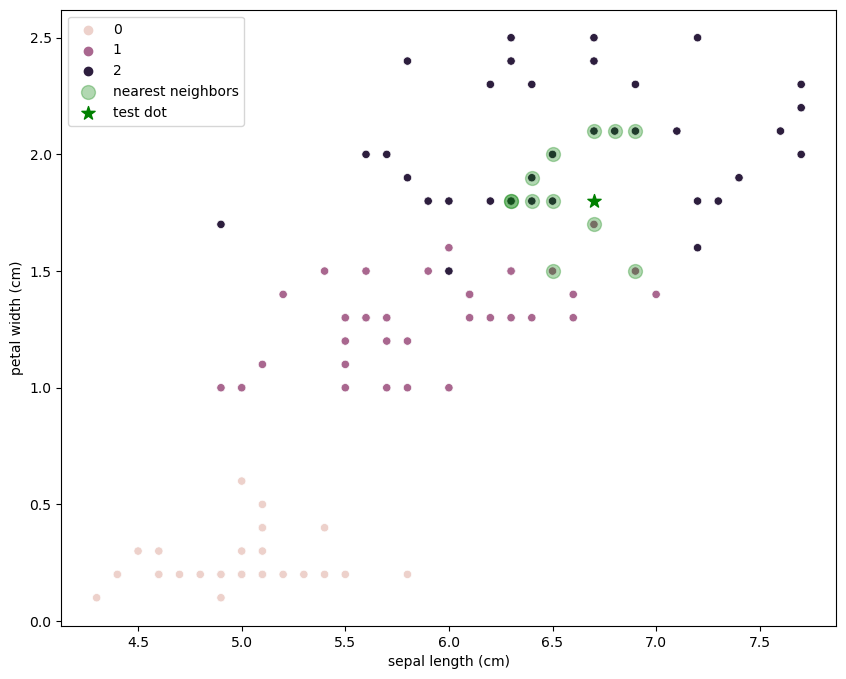

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ["darkorange", "darkblue"]



plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
)

plt.scatter(X_train.iloc[:,0].loc[nearest_neigbors_idxs], X_train.iloc[:,1].loc[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(test_points_X, test_points_Y, c='g',
            marker='*', s=100, label='test dot')
plt.legend()

## 3. Еще одна задача классификации


### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.


In [1]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


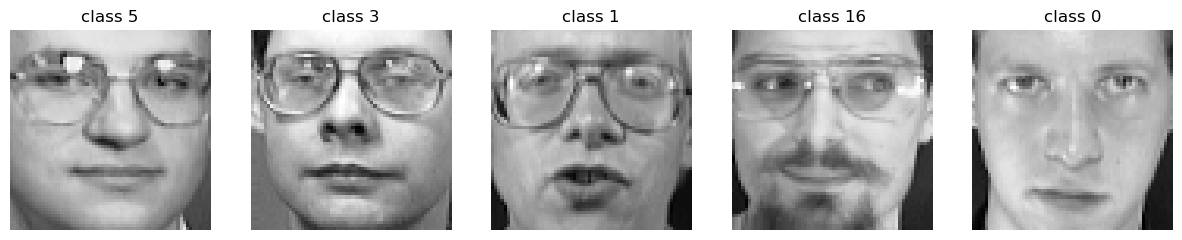

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [3]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn


#### 3.1.1. Разбейте данные на обучение и тест


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### 3.1.2. Обучите модель KNN на 50 соседях


In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=50)

knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [13]:
from sklearn.metrics import accuracy_score

knn_classifier.score(X_test, y_test)

0.3375

### 3.2. Weighted KNN


#### 3.2.1. Обучите модель взвешенный KNN по дистанции


In [7]:
from sklearn.neighbors import KNeighborsClassifier

weighted_knn_classifier = KNeighborsClassifier(n_neighbors=50, weights='distance')

weighted_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [14]:
weighted_knn_classifier.score(X_test, y_test)

0.625

### 3.3. Custom Weighted KNN


#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)



In [18]:
import numpy as np
def calc_weight_n_neigbours(dists): # Функция подсчета весов от номера соседа
    weights = np.zeros(dists.shape)

    for i in range(dists.shape[1]):
        weights[:, i] = 1/(i+1)

    return weights

#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше


In [19]:
from sklearn.neighbors import KNeighborsClassifier

custom_weighted_knn = KNeighborsClassifier(n_neighbors=50, weights=calc_weight_n_neigbours)

custom_weighted_knn.fit(X_train,  y_train)

KNeighborsClassifier(n_neighbors=50,
                     weights=<function calc_weight_n_neigbours at 0x0000020EB8596430>)

#### 3.3.3. Проверьте качество работы модели


In [20]:
custom_weighted_knn.score(X_test, y_test)

0.9

## KNN для регрессии


### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.


In [102]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [103]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк


In [104]:
X = X[['MedInc']].iloc[:1000]
X

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
995,4.8624
996,9.1531
997,4.7361
998,5.4324


In [105]:
y = y[:1000]
y

array([4.526  , 3.585  , 3.521  , 3.413  , 3.422  , 2.697  , 2.992  ,
       2.414  , 2.267  , 2.611  , 2.815  , 2.418  , 2.135  , 1.913  ,
       1.592  , 1.4    , 1.525  , 1.555  , 1.587  , 1.629  , 1.475  ,
       1.598  , 1.139  , 0.997  , 1.326  , 1.075  , 0.938  , 1.055  ,
       1.089  , 1.32   , 1.223  , 1.152  , 1.104  , 1.049  , 1.097  ,
       0.972  , 1.045  , 1.039  , 1.914  , 1.76   , 1.554  , 1.5    ,
       1.188  , 1.888  , 1.844  , 1.823  , 1.425  , 1.375  , 1.875  ,
       1.125  , 1.719  , 0.938  , 0.975  , 1.042  , 0.875  , 0.831  ,
       0.875  , 0.853  , 0.803  , 0.6    , 0.757  , 0.75   , 0.861  ,
       0.761  , 0.735  , 0.784  , 0.844  , 0.813  , 0.85   , 1.292  ,
       0.825  , 0.952  , 0.75   , 0.675  , 1.375  , 1.775  , 1.021  ,
       1.083  , 1.125  , 1.313  , 1.625  , 1.125  , 1.125  , 1.375  ,
       1.188  , 0.982  , 1.188  , 1.625  , 1.375  , 5.00001, 1.625  ,
       1.375  , 1.625  , 1.875  , 1.792  , 1.3    , 1.838  , 1.25   ,
       1.7    , 1.93

### Отрисуйте данные на графике


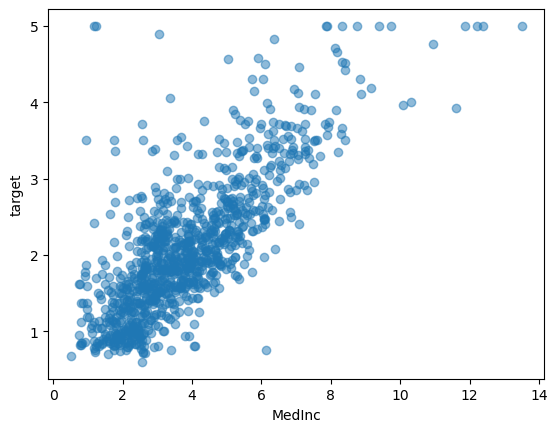

In [106]:
plt.scatter(X['MedInc'], y[:1000], alpha=0.5)
plt.xlabel('MedInc')
_ = plt.ylabel('target')

### 4. KNN из sklearn


#### 4.1. Разбейте данные на обучение и тест


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y[:1000], test_size=0.2, random_state=13)

#### 4.2. Обучите модель KNN на 100 соседях


In [100]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=100)

knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [107]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

y_pred = knn_regressor.predict(X_test)
r2_score(y_pred, y_test) 

-0.0973743990445004

#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения


In [113]:

import numpy as np
import pandas as pd

random_objects = X_test.sample(n=1)

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows(): 
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')
distances.sort_values(['object_idx', 'dst'], ascending=True)

,object_idx,train_idx,dst
268,423,706,0.0154
172,423,891,0.0246
540,423,862,0.0352
768,423,280,0.0413
662,423,966,0.0493
...,...,...,...
158,423,71,5.5139
304,423,510,5.6178
359,423,73,5.7426
115,423,514,6.1379


#### 4.5. Выберите топ k соседей


In [121]:
k =10
distances.sort_values(['object_idx', 'dst'], ascending=True).head(k)

,object_idx,train_idx,dst
268,423,706,0.0154
172,423,891,0.0246
540,423,862,0.0352
768,423,280,0.0413
662,423,966,0.0493
488,423,582,0.0555
559,423,961,0.0655
171,423,405,0.0685
191,423,418,0.0832
400,423,518,0.0875


#### 4.6. Выведите финальное предсказание для этого объекта


In [124]:
import statistics

for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(k)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Real value:', real_value)
    print('Predicted value:', statistics.mean(prdicted_values))

Real value: 3.918
Predicted value: 3.2603


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`


In [125]:
knn_prediction = knn_regressor.predict(random_objects)
print("KNN Prediction:", knn_prediction[0])

KNN Prediction: 3.0516600000000005


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей


In [134]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    idx = X_test.index.to_list().index(test_idx)
    test_points_Y.append(y_test[idx])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(k)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

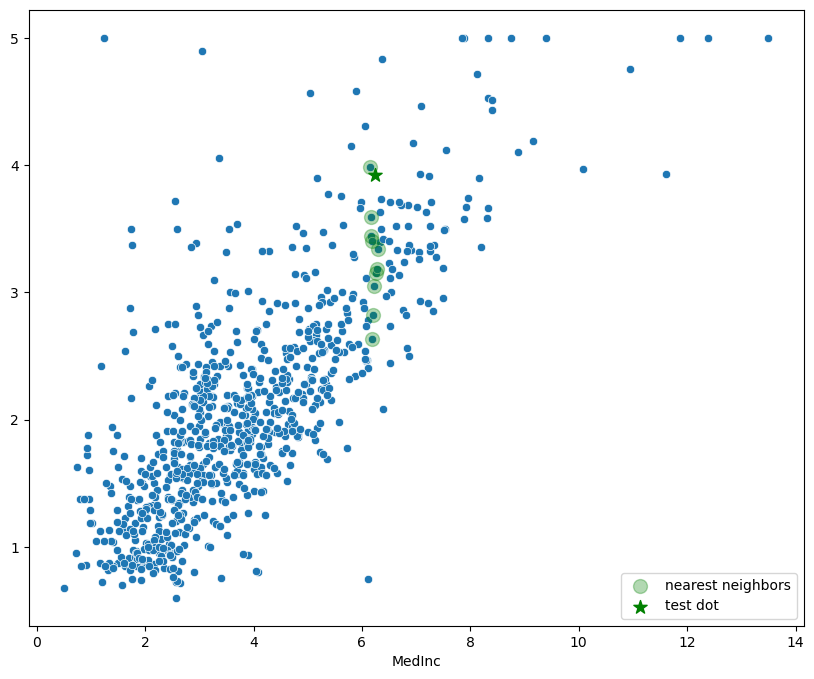

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ["darkorange", "darkblue"]



plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:,0],
    y=y_train,
)

y_nearest_neigbors_idxs = [X_train.index.to_list().index(idx) for idx in nearest_neigbors_idxs] 
plt.scatter(X_train.iloc[:,0].loc[nearest_neigbors_idxs], y_train[y_nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(test_points_X, test_points_Y, c='g',
            marker='*', s=100, label='test dot')
plt.legend()

### 5. Weighted KNN


#### 5.1. Обучите модель взвешенный KNN по дистанции


In [152]:
from sklearn.neighbors import KNeighborsRegressor

k = 10
weighted_knn_regressor = KNeighborsRegressor(n_neighbors=k, weights='distance')

weighted_knn_regressor.fit(X_train, y_train)

y_pred_weighted_knn = weighted_knn_regressor.predict(X_test)

#### 5.2. Проверьте качество работы модели


In [153]:
r2_score(y_pred_weighted_knn, y_test) 

0.14794110690845552

#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения


In [157]:

import numpy as np
import pandas as pd

random_objects = random_objects

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows(): 
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')
distances.sort_values(['object_idx', 'dst'], ascending=True)

,object_idx,train_idx,dst
268,423,706,0.0154
172,423,891,0.0246
540,423,862,0.0352
768,423,280,0.0413
662,423,966,0.0493
...,...,...,...
158,423,71,5.5139
304,423,510,5.6178
359,423,73,5.7426
115,423,514,6.1379


#### 5.4. Выберите топ k соседей


In [159]:
distances.sort_values(['object_idx', 'dst'], ascending=True).head(k)

,object_idx,train_idx,dst
268,423,706,0.0154
172,423,891,0.0246
540,423,862,0.0352
768,423,280,0.0413
662,423,966,0.0493
488,423,582,0.0555
559,423,961,0.0655
171,423,405,0.0685
191,423,418,0.0832
400,423,518,0.0875


#### 5.5. Рассчитайте вес для каждого соседа


In [160]:
distances['weight'] = 1/ distances['dst']
distances.sort_values(['object_idx', 'weight'], ascending=False).head(k)

,object_idx,train_idx,dst,weight
268,423,706,0.0154,64.935065
172,423,891,0.0246,40.650407
540,423,862,0.0352,28.409091
768,423,280,0.0413,24.213075
662,423,966,0.0493,20.283976
488,423,582,0.0555,18.018018
559,423,961,0.0655,15.267176
171,423,405,0.0685,14.598540
191,423,418,0.0832,12.019231
400,423,518,0.0875,11.428571


#### 5.6. Выведите финальное предсказание для этого объекта


In [162]:
for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['weight'], ascending=False).head(12)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Real value:', real_value)
    print('Predicted value:', statistics.mean(prdicted_values))

Real value: 3.918
Predicted value: 3.3023333333333333


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`


In [163]:
knn_prediction = weighted_knn_regressor.predict(random_objects)
print("KNN Prediction:", knn_prediction[0])

KNN Prediction: 3.1814386014952616


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности


In [164]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    idx = X_test.index.to_list().index(test_idx)
    test_points_Y.append(y_test[idx])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['weight'], ascending=False).head(12)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

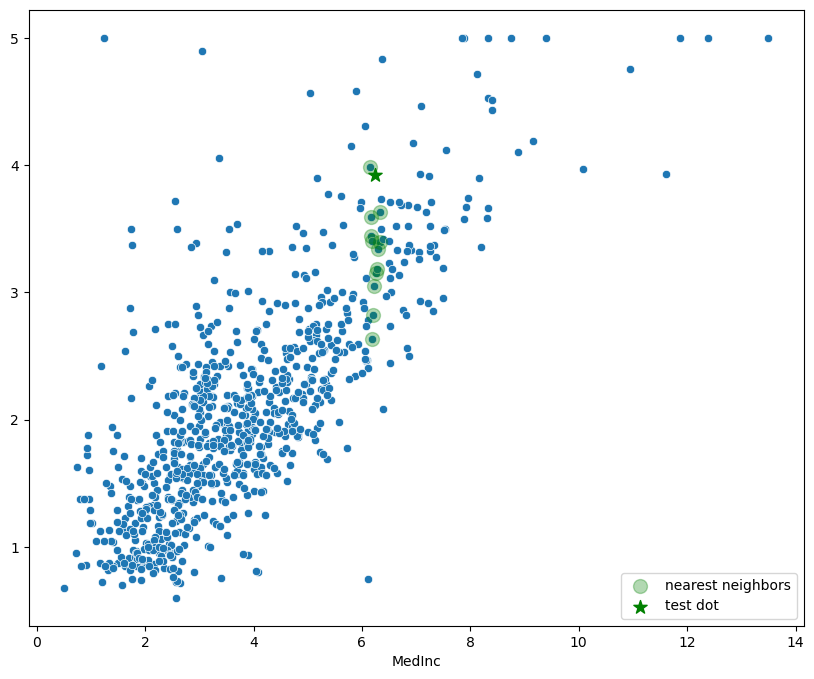

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ["darkorange", "darkblue"]



plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:,0],
    y=y_train,
)

y_nearest_neigbors_idxs = [X_train.index.to_list().index(idx) for idx in nearest_neigbors_idxs] 
plt.scatter(X_train.iloc[:,0].loc[nearest_neigbors_idxs], y_train[y_nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(test_points_X, test_points_Y, c='g',
            marker='*', s=100, label='test dot')
plt.legend()

## 6. Еще одна задача регрессии


### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.


In [166]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.


In [167]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.


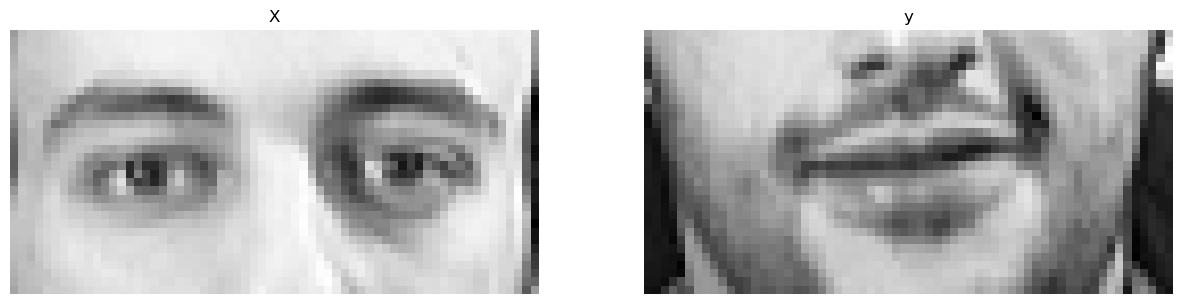

In [168]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях


In [169]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [170]:
pred_test = {
    'knn': None,
    'weighted_knn': None,
    'weighted_knn_custom': None
}

In [171]:
y_pred_knn = knn.predict(X_test)

pred_test['knn'] = y_pred_knn

In [172]:
r2_score(y_pred_knn, y_test) 

-11.693276577608428

#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях


In [174]:
from sklearn.neighbors import KNeighborsRegressor

weighted_knn = KNeighborsRegressor(n_neighbors=100, weights='distance')

weighted_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [175]:
y_pred_weighted_knn = weighted_knn.predict(X_test)

pred_test['weighted_knn'] = y_pred_weighted_knn

In [176]:
r2_score(y_pred_weighted_knn, y_test)

-9.723678421559578

#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [189]:
def calc_weight_n_neigbours(dists): # Функция подсчета весов от номера соседа
    weights = np.zeros(dists.shape)

    for i in range(dists.shape[1]):
        weights[:, i] = 1/(i+1)

    return weights

#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях


In [190]:
from sklearn.neighbors import KNeighborsRegressor

weighted_knn_custom = KNeighborsRegressor(n_neighbors=50, weights=calc_weight_n_neigbours)

weighted_knn_custom.fit(X_train,  y_train)

KNeighborsRegressor(n_neighbors=50,
                    weights=<function calc_weight_n_neigbours at 0x0000020EBE0C98B0>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [191]:
y_pred_weighted_knn_custom = weighted_knn_custom.predict(X_test)

pred_test['weighted_knn_custom'] = y_pred_weighted_knn_custom

In [192]:
r2_score(y_pred_weighted_knn_custom, y_test)

-0.9022598158386703

А сейчас отрисуем все предсказания.


In [194]:
ESTIMATORS = {
    'knn': knn,
    'weighted_knn': weighted_knn,
    'weighted_knn_custom': weighted_knn_custom
}

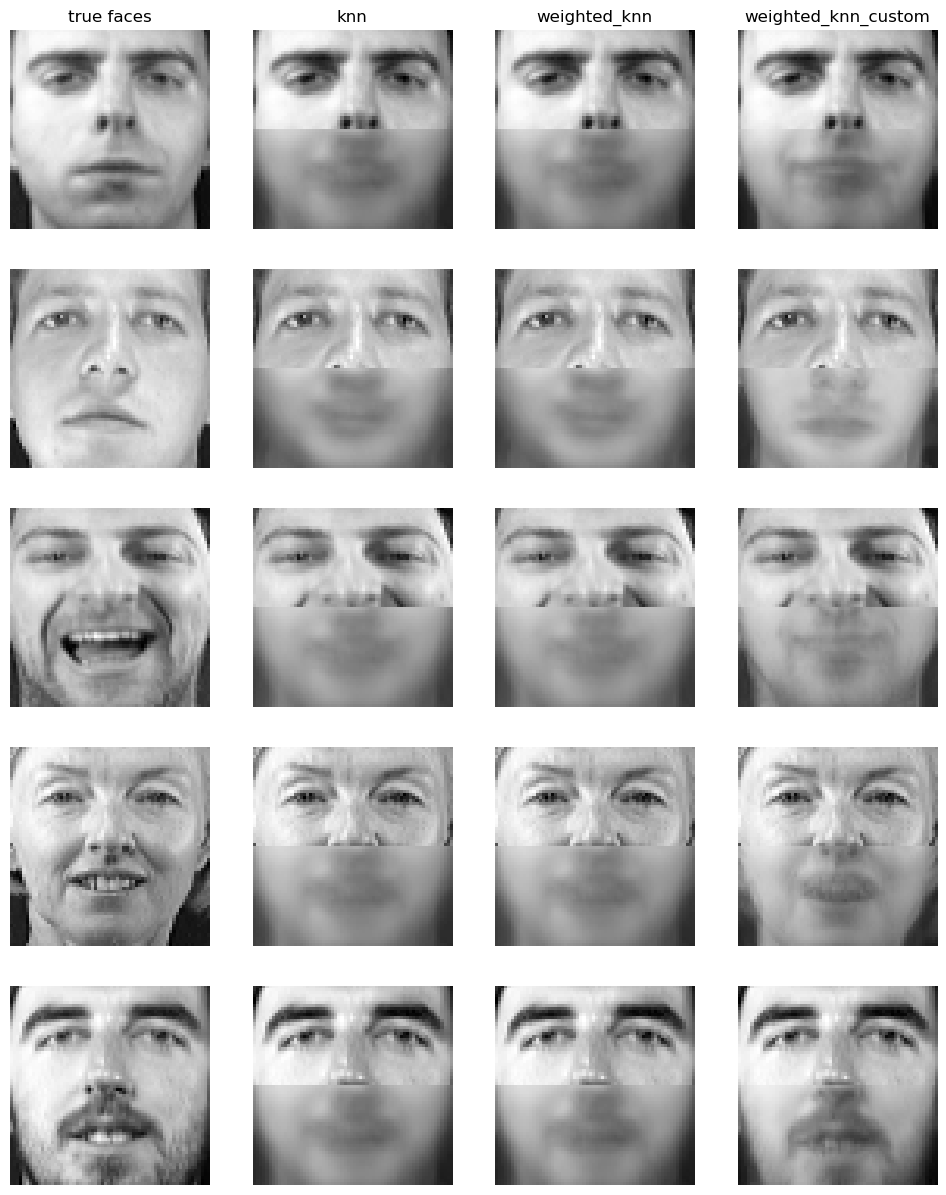

In [195]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7\*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)

[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)


In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

param_grid = {
    "n_neighbors": [1, 2, 3, 5, 10, 20, 50, 100, 150, 200],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

grid = GridSearchCV(knn, param_grid, cv=10, scoring='r2', verbose=1)

grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


In [208]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}

In [209]:
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

In [210]:
r2_score(y_pred_best, y_test)

0.28254895312501005

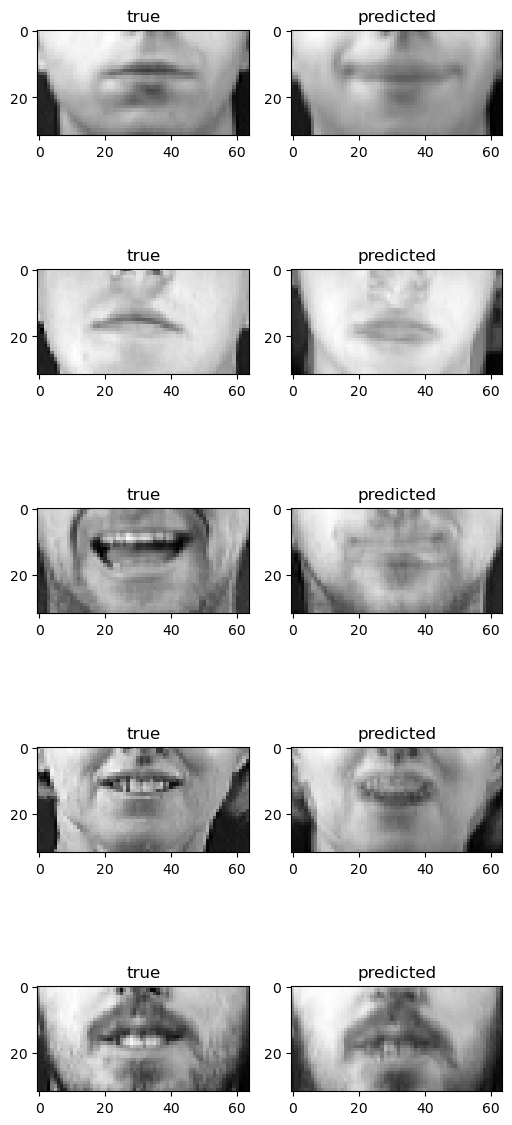

In [233]:
n_faces = 5
n_cols = 1
plt.figure(figsize=(3 * 2, 3 * n_faces))

c = 0
for i in range(5):
    c+= 1
    plt.subplot(5, 2, c)
    plt.title('true')
    plt.imshow(y_test[i].reshape((32, 64)), 'gray')
    c+= 1
    plt.subplot(5, 2, c)
    plt.title('predicted')
    plt.imshow(y_pred_best[i].reshape((32, 64)), 'gray')

plt.show()